# Exploração e Visualização das Taxas de Incidência
### Parte 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
t = pd.read_csv('../data/processed/rates_per_year_groupby_municipalities_all.csv', index_col='ibge_code')
municipios = pd.read_csv('../data/interim/municipios/brasil_municipios_reduced_all.csv')

In [3]:
t.describe().T

,count,mean,std,min,25%,50%,75%,max
2007,5570.0,1.638821,8.072993,0.0,0.0,0.0,0.0,187.539071
2008,5570.0,1.603123,7.318359,0.0,0.0,0.0,0.0,192.230206
2009,5570.0,1.833769,8.320588,0.0,0.0,0.0,0.0,142.314991
2010,5570.0,1.862355,7.803647,0.0,0.0,0.0,0.0,179.291797
2011,5570.0,2.209931,11.408595,0.0,0.0,0.0,0.0,341.880342
2012,5570.0,1.625439,8.910646,0.0,0.0,0.0,0.0,465.509945
2013,5570.0,1.773201,7.438360,0.0,0.0,0.0,0.0,223.613596
2014,5570.0,1.970938,8.352224,0.0,0.0,0.0,0.0,215.252153
2015,5570.0,1.855488,6.677674,0.0,0.0,0.0,0.0,111.084662
2016,5570.0,1.803404,6.850610,0.0,0.0,0.0,0.0,144.867550


In [4]:
municipios

,ibge_code,municipio,estado,mesorregiao,microrregiao
0,110001,Alta Floresta D'Oeste,Rondônia,Leste Rondoniense,Cacoal
1,110037,Alto Alegre dos Parecis,Rondônia,Leste Rondoniense,Cacoal
2,110040,Alto Paraíso,Rondônia,Leste Rondoniense,Ariquemes
3,110034,Alvorada D'Oeste,Rondônia,Leste Rondoniense,Alvorada D'Oeste
4,110002,Ariquemes,Rondônia,Leste Rondoniense,Ariquemes
...,...,...,...,...,...
5565,522200,Vianópolis,Goiás,Sul Goiano,Pires do Rio
5566,522205,Vicentinópolis,Goiás,Sul Goiano,Meia Ponte
5567,522220,Vila Boa,Goiás,Leste Goiano,Entorno de Brasília
5568,522230,Vila Propício,Goiás,Leste Goiano,Entorno de Brasília


Esta é a primeira exploração dos dados de taxa de incidência do estado.

Metodologia: verificar a correlação entre as taxas de incidência em diferentes regiões no estado. 
Primeiro uma comparação da evolução anual das mesorregiões. Observa-se que o sudeste teve taxa média maior nos últimos anos. Em seguida, visualiza-se o sudeste a nível de microrregião e o destaque foi a microrregião de Parauapebas. Também visualiza-se os municípios da microrregião Parauapebas e os da microrregião de São Félix.
Finalmente, visualiza-se Ourilândia e seus vizinhos, e Parauapebas e seus vizinhos (Eldorado não faz fronteira, mas foi adicionado)
Foram gerados relatórios utilizando o "ProfileReport", estão em "/reports". Neles é possível verificar a correlação entre os locais.

Método: visualização de dados, matplotlib e pandas

In [5]:
def heatmap(data, output=None):
    import seaborn as sns

    f, ax = plt.subplots(figsize=(10, 10))
    corr = data.corr()
    mask = np.triu(corr, 1)
    heatmap = sns.heatmap(
        corr, mask=mask, cmap=plt.cm.Blues, square=True, ax=ax, annot=True, cbar_kws={"shrink": .6}
    )
    heatmap.set_xticklabels(
        heatmap.get_xticklabels(), 
        rotation=40, 
        horizontalalignment='right'
    )
    heatmap.set_yticklabels(
        heatmap.get_yticklabels(), 
        rotation=40, 
        horizontalalignment='right'
    )
    if output:
        f.savefig(f'../images/{output}', dpi=1200, bbox_inches='tight')


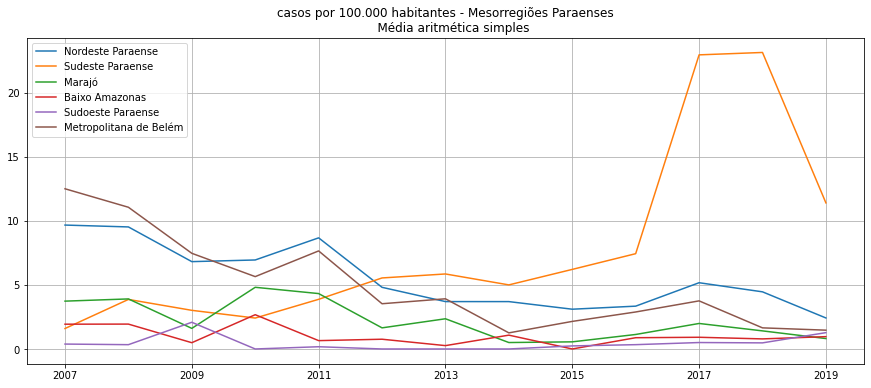

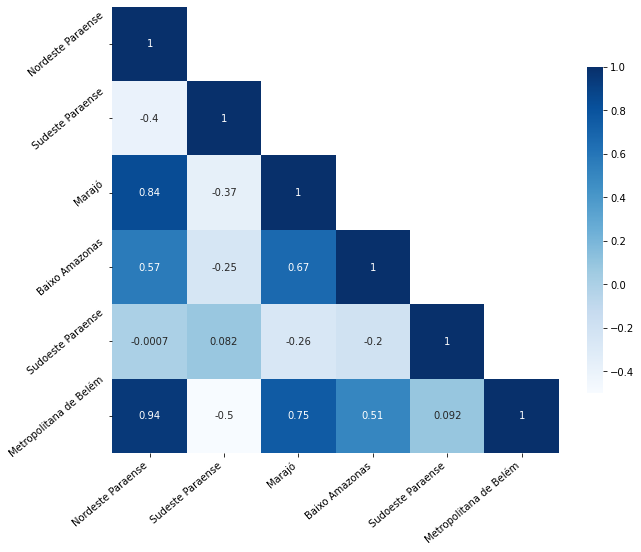

In [6]:
# média aritmética simples anual de cada mesorregião por ano

ne = t.loc[municipios.loc[municipios.mesorregiao == 'Nordeste Paraense', 'ibge_code']].mean()
se = t.loc[municipios.loc[municipios.mesorregiao == 'Sudeste Paraense', 'ibge_code']].mean()                   
marajo = t.loc[municipios.loc[municipios.mesorregiao == 'Marajó', 'ibge_code']].mean()               
baixo_am = t.loc[municipios.loc[municipios.mesorregiao == 'Baixo Amazonas', 'ibge_code']].mean()
so = t.loc[municipios.loc[municipios.mesorregiao == 'Sudoeste Paraense', 'ibge_code']].mean()           
metropolitana = t.loc[municipios.loc[municipios.mesorregiao == 'Metropolitana de Belém', 'ibge_code']].mean()

data = pd.concat([ne, se, marajo, baixo_am, so, metropolitana], axis=1)
data.columns = municipios.mesorregiao[municipios.estado == 'Pará'].unique()

data.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Mesorregiões Paraenses
    Média aritmética simples'''
);
plt.savefig('../images/mesorregioes_plot.png')
heatmap(data, 'mesorregioes_corr.png')


In [7]:
municipios.loc[municipios.mesorregiao == 'Sudeste Paraense', 'microrregiao'].unique()

array(['Paragominas', 'Parauapebas', 'São Félix do Xingu', 'Marabá',
       'Tucuruí', 'Conceição do Araguaia', 'Redenção'], dtype=object)

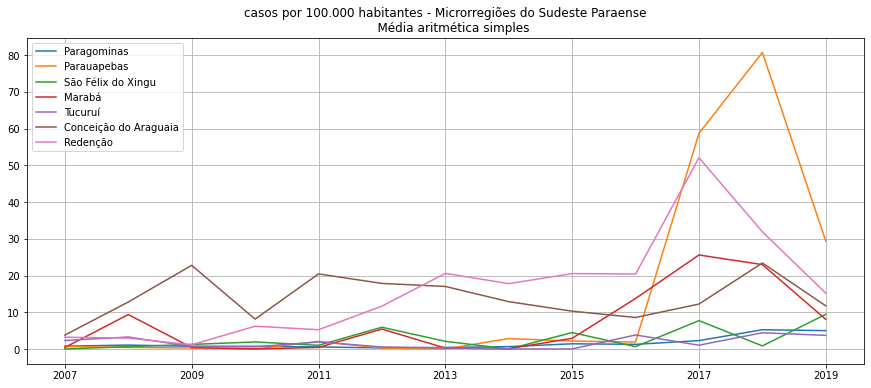

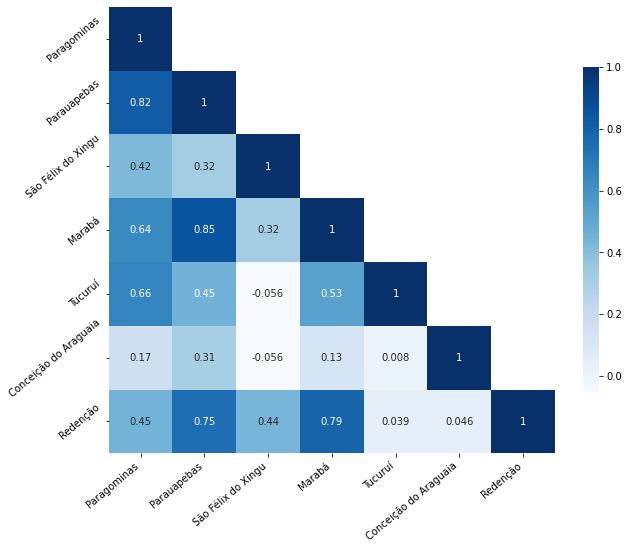

In [8]:
paragominas = t.loc[municipios.ibge_code[municipios.microrregiao == 'Paragominas']].mean()
parauapebas = t.loc[municipios.ibge_code[municipios.microrregiao == 'Parauapebas']].mean()
sao_felix = t.loc[municipios.ibge_code[municipios.microrregiao == 'São Félix do Xingu']].mean()
maraba = t.loc[municipios.ibge_code[municipios.microrregiao == 'Marabá']].mean()
tucurui = t.loc[municipios.ibge_code[municipios.microrregiao == 'Tucuruí']].mean()
conceicao = t.loc[municipios.ibge_code[municipios.microrregiao == 'Conceição do Araguaia']].mean()
redencao = t.loc[municipios.ibge_code[municipios.microrregiao == 'Redenção']].mean()

data = pd.concat(
    [paragominas, parauapebas, sao_felix, maraba, tucurui, conceicao, redencao], 
    axis=1
)
data.columns = municipios.microrregiao[municipios.mesorregiao == 'Sudeste Paraense'].unique()

data.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Microrregiões do Sudeste Paraense
    Média aritmética simples'''
);
plt.savefig('../images/microrregioes_sudeste_plot.png')
heatmap(data, 'microrregioes_sudeste_corr.png')

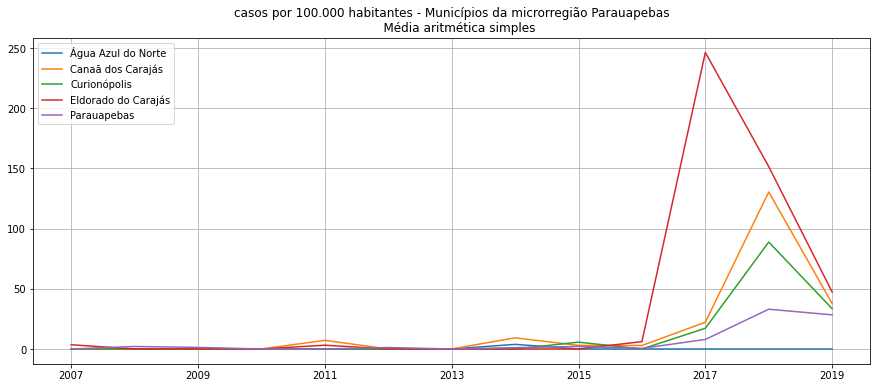

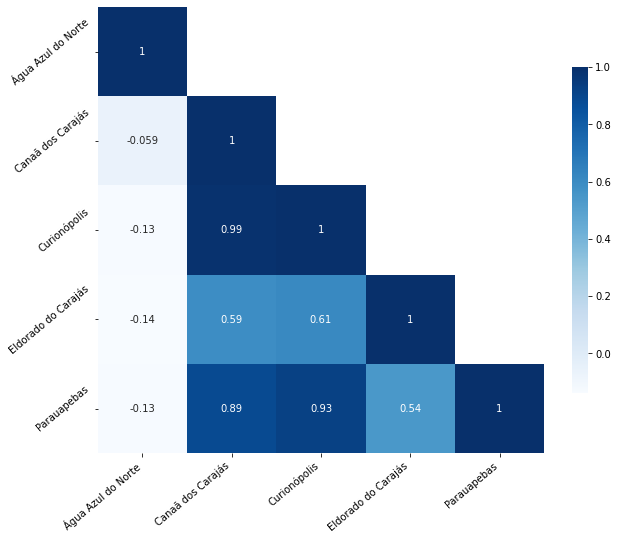

In [9]:
data = t.loc[municipios.loc[municipios.microrregiao == 'Parauapebas', 'ibge_code'], :]
data.index = data.index.map(
    dict(zip(
        municipios.loc[municipios.microrregiao == 'Parauapebas', 'ibge_code'],
        municipios.loc[municipios.microrregiao == 'Parauapebas', 'municipio']
    ))
)

data.index.name = None
data.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios da microrregião Parauapebas
    Média aritmética simples'''
);
plt.savefig('../images/municipios_micro_parauapebas_plot.png')
heatmap(data.T, 'municipios_micro_parauapebas_corr.png')


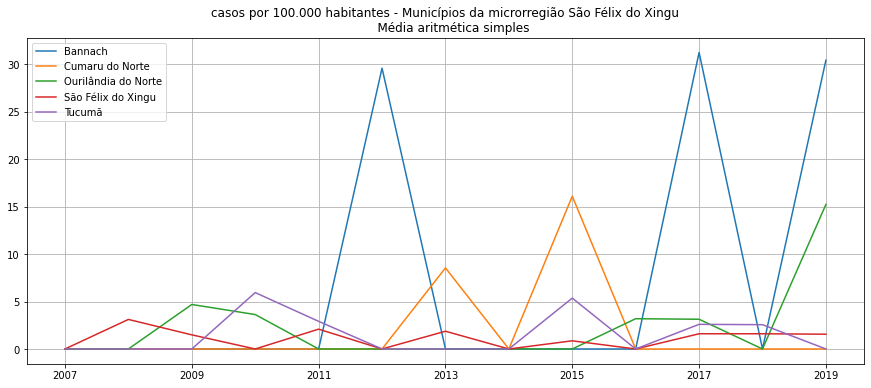

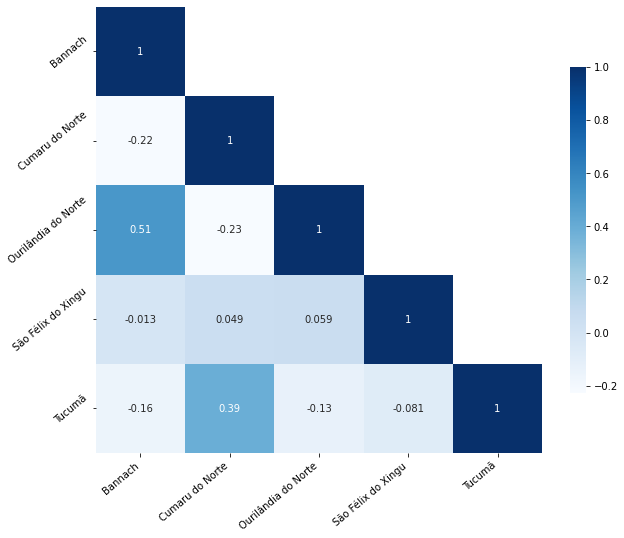

In [10]:
data = t.loc[municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'ibge_code'], :]
data.index = data.index.map(
    dict(zip(
        municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'ibge_code'],
        municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'municipio']
    ))
)

data.index.name = None
data.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios da microrregião São Félix do Xingu
    Média aritmética simples'''
);
plt.savefig('../images/municipios_micro_saofelix_plot.png')
heatmap(data.T, 'municipios_micro_saofelix_corr.png')


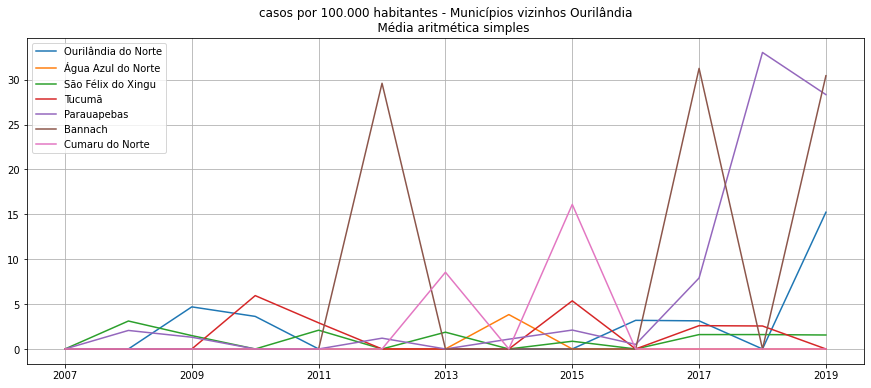

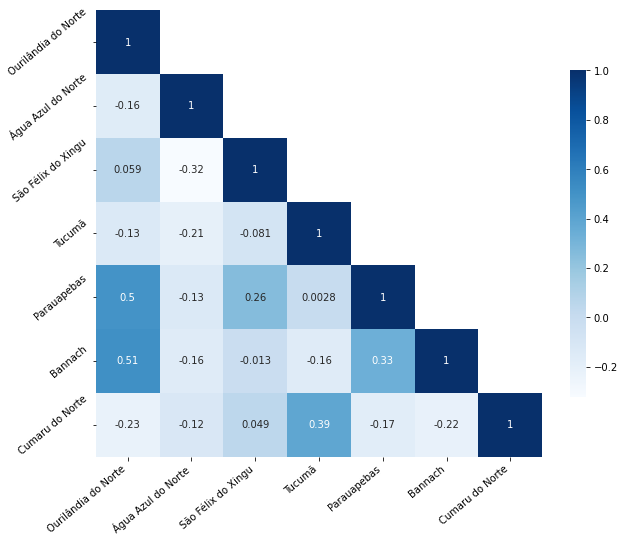

In [11]:
limitrofes = ['Ourilândia do Norte', 'Água Azul do Norte', 'São Félix do Xingu', 'Tucumã', 'Parauapebas', 'Bannach', 'Cumaru do Norte']
idx = [int(municipios.loc[municipios.municipio == it, 'ibge_code']) for it in limitrofes]

ouri_vizinhos = t.loc[idx,:].copy()
ouri_vizinhos.index = ouri_vizinhos.index.map(dict(zip(idx, limitrofes)))
ouri_vizinhos.index.name = None
ouri_vizinhos.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios vizinhos Ourilândia
    Média aritmética simples'''
);
plt.savefig('../images/municipios_vizinhos_ourilandia_plot.png')
heatmap(ouri_vizinhos.T, 'municipios_vizinhos_ourilandia_corr.png')

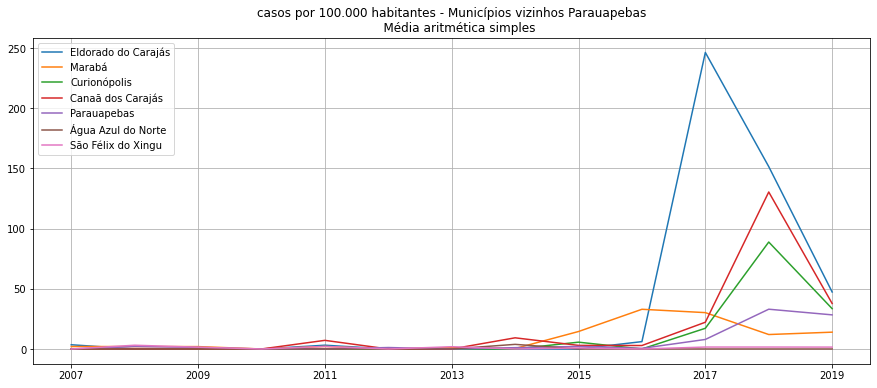

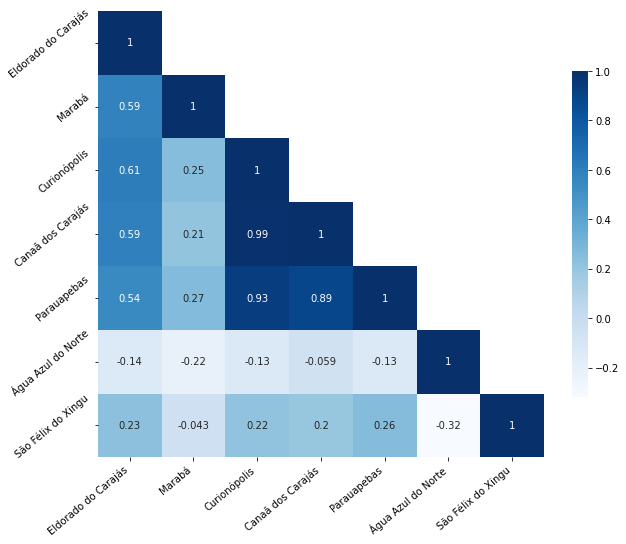

In [12]:
limitrofes = ['Eldorado do Carajás', 'Marabá', 'Curionópolis', 'Canaã dos Carajás', 'Parauapebas', 'Água Azul do Norte', 'São Félix do Xingu']
idx = [int(municipios.loc[municipios.municipio == it, 'ibge_code']) for it in limitrofes]

pebas = t.loc[idx,:].copy()
pebas.index = pebas.index.map(dict(zip(idx, limitrofes)))

pebas.index.name = None
ax = pebas.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios vizinhos Parauapebas
    Média aritmética simples'''
);
plt.savefig('../images/municipios_vizinhos_parauapebas_plot.png')
heatmap(pebas.T, 'municipios_vizinhos_parauapebas_corr.png')


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Eldorado,3.502136,0.0,0.0,0.0,3.129499,0.0,0.0,0.0,0.0,6.101281,246.260489,151.452159,47.326077


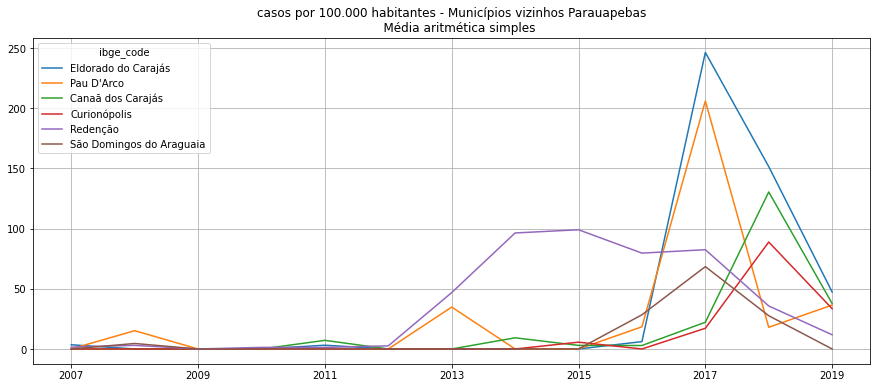

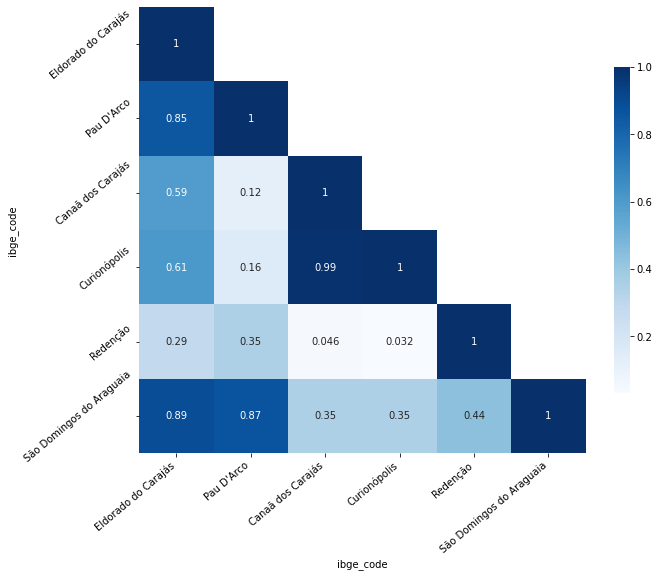

In [13]:
m = pd.concat([
    municipios.loc[municipios.microrregiao == 'Marabá', ['ibge_code', 'municipio']].set_index('ibge_code'),
    municipios.loc[municipios.microrregiao == 'Parauapebas', ['ibge_code', 'municipio']].set_index('ibge_code'),
    municipios.loc[municipios.microrregiao == 'Redenção', ['ibge_code', 'municipio']].set_index('ibge_code')  
])
data = t.loc[m.index, :]
data.index = data.index.map(m.to_dict()['municipio'])
data = data.T
idx = data.iloc[-3:, :].describe().loc['mean'].sort_values(ascending=False).head(6).index
data.loc[:, idx].plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios vizinhos Parauapebas
    Média aritmética simples'''
);
display(t.loc[150295,:].to_frame(name='Eldorado').T)
heatmap(data.loc[:, idx])